# Taylor Woodington
# Manatee Population Analysis
# DSC680

In [2]:
# Import necessities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Load the dataset
data = pd.read_csv(r'C:\Users\Shaun\Downloads\Manatee_Synoptic_Survey_Observation_Locations (1).csv')

In [4]:
# Initial data exploration
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16593 entries, 0 to 16592
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 16593 non-null  float64
 1   Y                 16593 non-null  float64
 2   OBJECTID          16593 non-null  int64  
 3   SURV_ID           16593 non-null  object 
 4   LOC_ID            16593 non-null  int64  
 5   DATE_             16593 non-null  object 
 6   YEAR              16593 non-null  int64  
 7   MONTH             16593 non-null  int64  
 8   DAY               16593 non-null  int64  
 9   ADULTS            16593 non-null  int64  
 10  CALVES            16593 non-null  int64  
 11  TOTAL             16593 non-null  int64  
 12  COUNTY            16592 non-null  object 
 13  COAST             16593 non-null  object 
 14  STATE             16593 non-null  object 
 15  SUBPOP            16593 non-null  object 
 16  AGG_SITE          16593 non-null  object

In [5]:
# Beginning Clean Up
# Convert DATE_ to datetime format
data['DATE_'] = pd.to_datetime(data['DATE_'], errors='coerce')

# Drop any missing values
data.dropna(subset=['DATE_', 'TOTAL', 'ADULTS', 'CALVES'], inplace=True)

# Ensure no missing data
missing_data = data.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
X                   0
Y                   0
OBJECTID            0
SURV_ID             0
LOC_ID              0
DATE_               0
YEAR                0
MONTH               0
DAY                 0
ADULTS              0
CALVES              0
TOTAL               0
COUNTY              1
COAST               0
STATE               0
SUBPOP              0
AGG_SITE            0
last_edited_date    0
dtype: int64


In [6]:
# Descriptive statistics
total_observations = data['TOTAL'].sum()
print(f"Total manatees observed: {total_observations}")

Total manatees observed: 103824


In [7]:
# Create a year column for analysis
data['YEAR'] = data['DATE_'].dt.year

# Total manatee counts by year
yearly_counts = data.groupby('YEAR')['TOTAL'].sum().reset_index()
print(f"Yearly Counts: {yearly_counts}")

Yearly Counts:     YEAR  TOTAL
0   1991   2745
1   1992   1844
2   1995   3279
3   1996   4907
4   1997   3956
5   1998   2018
6   1999   6248
7   2000   3869
8   2001   3300
9   2002   1758
10  2003   8986
11  2004   2505
12  2005   3143
13  2006   3113
14  2007   2817
15  2009   3802
16  2010   5077
17  2011   4834
18  2014   4824
19  2015   6063
20  2016   6250
21  2017   6620
22  2018   6133
23  2019   5733


C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

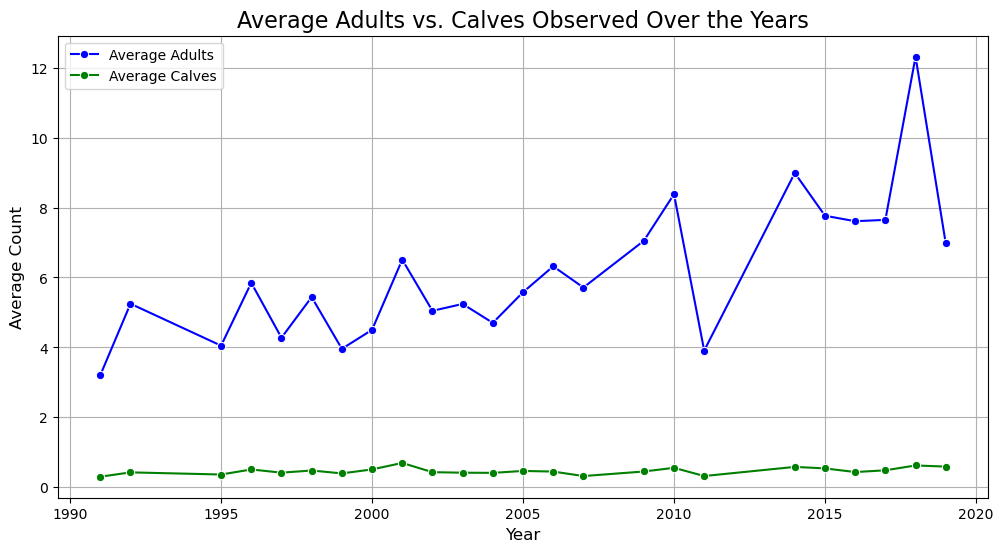

Yearly Average Statistics:
    YEAR     ADULTS    CALVES
0   1991   3.205619  0.300128
1   1992   5.249231  0.424615
2   1995   4.049798  0.363392
3   1996   5.848446  0.507772
4   1997   4.276394  0.416370
5   1998   5.439883  0.478006
6   1999   3.958885  0.395122
7   2000   4.502591  0.509067
8   2001   6.510917  0.694323
9   2002   5.046729  0.429907
10  2003   5.243073  0.415617
11  2004   4.702041  0.410204
12  2005   5.578846  0.465385
13  2006   6.319565  0.447826
14  2007   5.713062  0.319058
15  2009   7.049310  0.449704
16  2010   8.383803  0.554577
17  2011   3.909011  0.320210
18  2014   8.990079  0.581349
19  2015   7.767123  0.538356
20  2016   7.610039  0.433719
21  2017   7.648649  0.484029
22  2018  12.316456  0.622363
23  2019   6.973615  0.589710


In [8]:
# Calculate yearly averages for adults and calves
yearly_averages = data.groupby('YEAR')[['ADULTS', 'CALVES']].mean().reset_index()

# Visualization: Average Adults vs. Calves over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='ADULTS', data=yearly_averages, label='Average Adults', marker='o', color='blue')
sns.lineplot(x='YEAR', y='CALVES', data=yearly_averages, label='Average Calves', marker='o', color='green')
plt.title('Average Adults vs. Calves Observed Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Count', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Display statistics
print("Yearly Average Statistics:")
print(yearly_averages)

C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shaun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


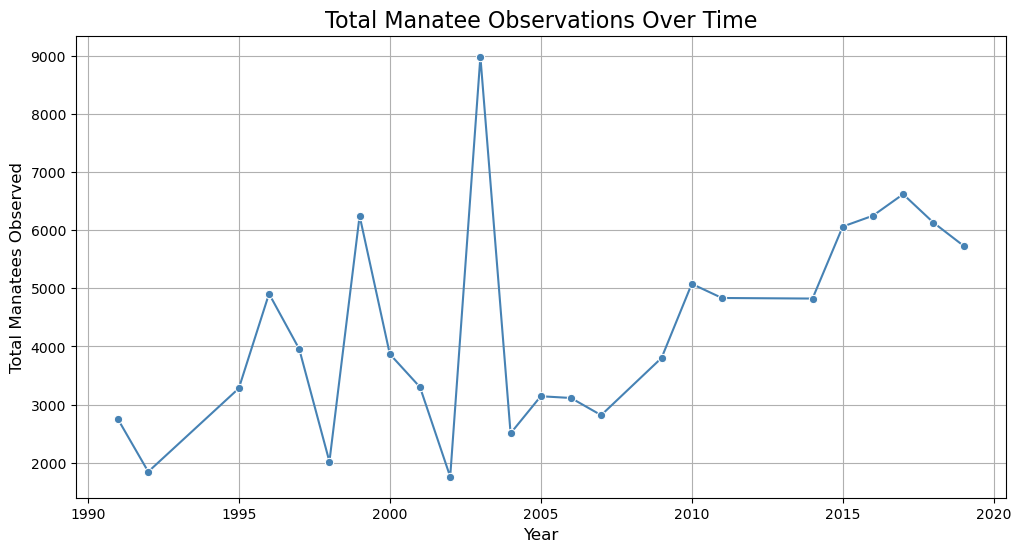

In [9]:
# Total manatee population over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='TOTAL', data=yearly_counts, marker='o', color='steelblue')
plt.title('Total Manatee Observations Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Manatees Observed', fontsize=12)
plt.grid(True)
plt.show()

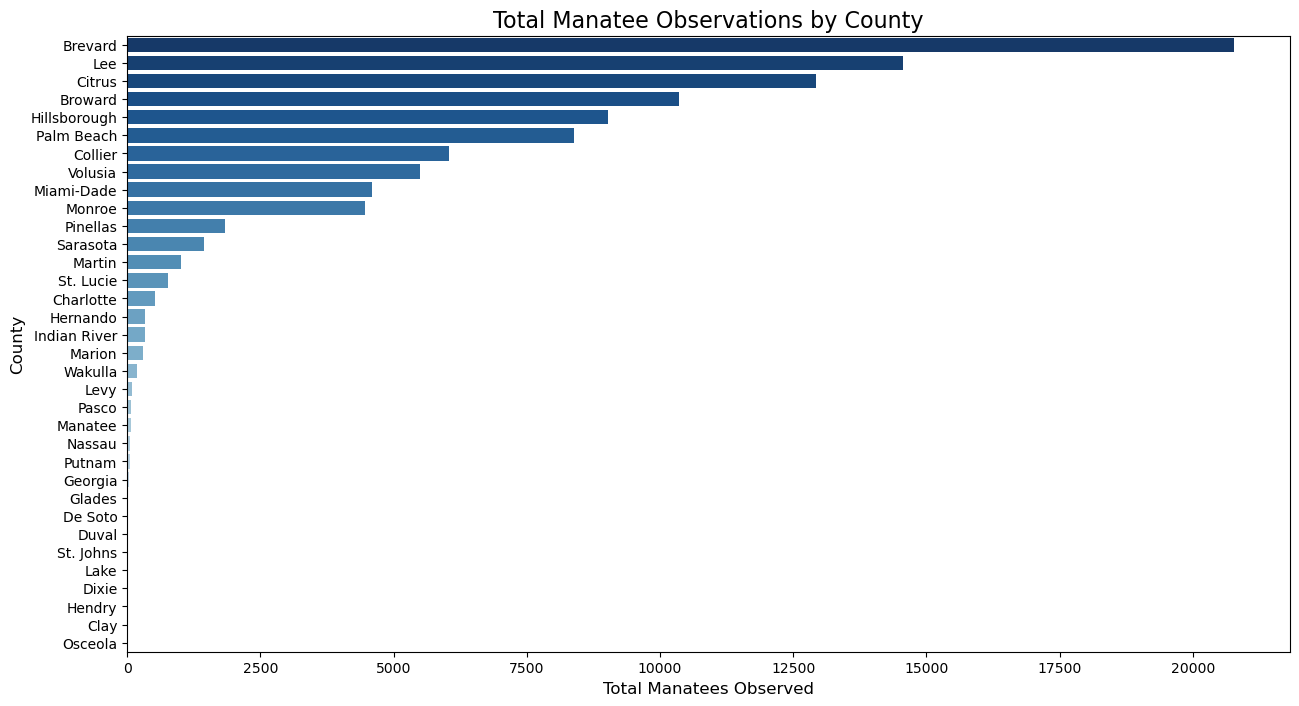

In [10]:
# Geospatial analysis: Observations by COUNTY
county_counts = data.groupby('COUNTY')['TOTAL'].sum().reset_index()

# Visualization 3: Total observations by county
plt.figure(figsize=(15, 8))
sns.barplot(y='COUNTY', x='TOTAL', data=county_counts.sort_values('TOTAL', ascending=False), palette='Blues_r')
plt.title('Total Manatee Observations by County', fontsize=16)
plt.xlabel('Total Manatees Observed', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.show()

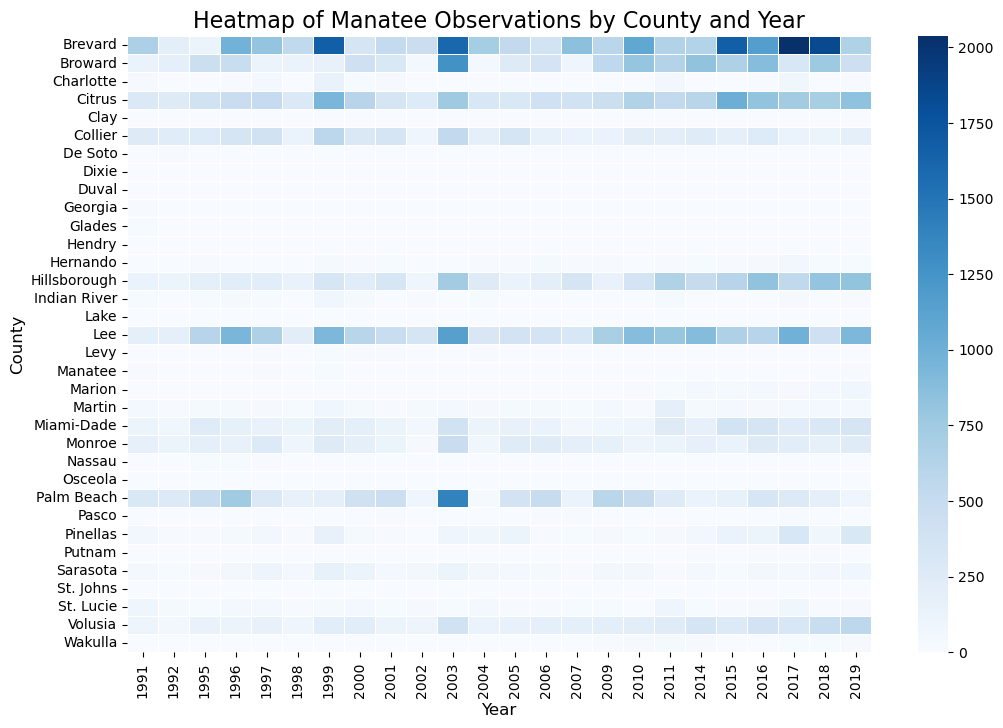

In [11]:
# Heatmap: Observations by County and Year
county_year_counts = data.pivot_table(index='COUNTY', columns='YEAR', values='TOTAL', aggfunc='sum', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(county_year_counts, cmap='Blues', annot=False, linewidths=0.5)
plt.title('Heatmap of Manatee Observations by County and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('County', fontsize=12)
plt.show()

## Analysis Questions Below

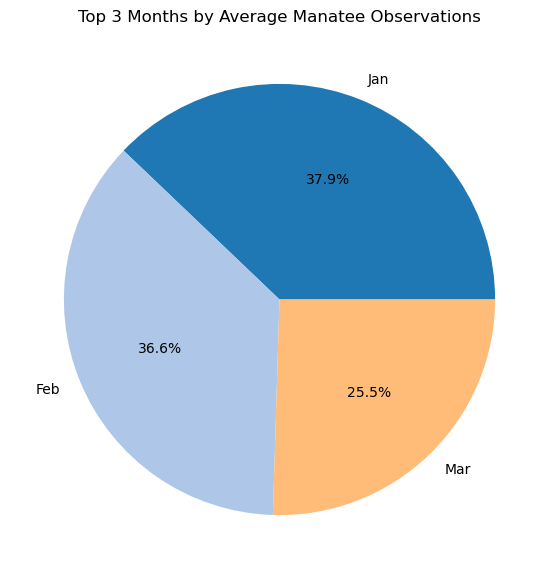

In [12]:
# Top 3 Months by Avg Manatee Observations
top_months = data[data['MONTH'].isin([1, 2, 3])]
monthly_avg = top_months.groupby('MONTH')['TOTAL'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 7))
plt.pie(monthly_avg, labels=["Jan", "Feb", "Mar"], autopct='%1.1f%%', colors=['#1f77b4', '#aec7e8', '#ffbb78'])
plt.title("Top 3 Months by Average Manatee Observations")
plt.show()

In [13]:
# Three Years with Lowest Observation Counts
yearly_counts = data.groupby('YEAR')['TOTAL'].sum().sort_values()
lowest_years = yearly_counts.head(3)
print("Three Lowest Years of Observation Counts:\n", lowest_years)

Three Lowest Years of Observation Counts:
 YEAR
2002    1758
1992    1844
1998    2018
Name: TOTAL, dtype: int64


In [14]:
# Highest and Lowest Calves Count
max_calves = data['CALVES'].max()
min_calves = data['CALVES'].min()
print(f"Highest Calves Observed: {max_calves}, Lowest Calves Observed: {min_calves}")


Highest Calves Observed: 52, Lowest Calves Observed: 0


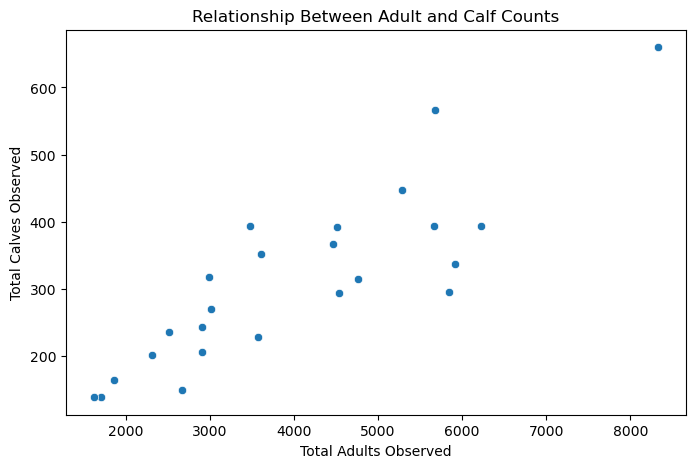

Correlation between Adults and Calves: 0.86


In [15]:
# Relationship Analysis with Adults and Calves
yearly_adults_calves = data.groupby('YEAR')[['ADULTS', 'CALVES']].sum()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=yearly_adults_calves['ADULTS'], y=yearly_adults_calves['CALVES'])
plt.xlabel("Total Adults Observed")
plt.ylabel("Total Calves Observed")
plt.title("Relationship Between Adult and Calf Counts")
plt.show()

correlation = yearly_adults_calves.corr().loc['ADULTS', 'CALVES']
print(f"Correlation between Adults and Calves: {correlation:.2f}")